# **Twitter Validation**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_col = ["ID","Location","Target","Text"]
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/NLP(Natural Language Pre-Processing)/twitter_validation.csv',names = df_col)

In [3]:
df.head()

,ID,Location,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [4]:
df.isna().sum()

,0
ID,0
Location,0
Target,0
Text,0


In [5]:
df["Target"].value_counts()

,count
Target,
Neutral,285
Positive,277
Negative,266
Irrelevant,172


In [6]:
df.drop(df.index[(df['Target']=="Irrelevant")],axis = 0,inplace = True)
df["Target"].value_counts()

,count
Target,
Neutral,285
Positive,277
Negative,266


In [7]:
df.head()

,ID,Location,Target,Text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [8]:
df.reset_index(drop = True,inplace = True)     # droping the old index and assigning new index to that row
df

,ID,Location,Target,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
df.drop(["ID","Location"],axis = 1, inplace = True)
df

,Target,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
df["Target"] = df["Target"].map({"Positive":1,"Negative":-1,"Neutral":0})
df

,Target,Text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [11]:
tweets = df.Text
tweets

,Text
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,"CSGO matchmaking is so full of closet hacking,..."
3,Now the President is slapping Americans in the...
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...
823,Please explain how this is possible! How can t...
824,Good on Sony. As much as I want to see the new...
825,Today sucked so it’s time to drink wine n play...
826,Bought a fraction of Microsoft today. Small wins.


In [12]:
tweets = tweets.str.replace(r"[^a-zA-Z0-9]"," ")
tweets

,Text
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,"CSGO matchmaking is so full of closet hacking,..."
3,Now the President is slapping Americans in the...
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...
823,Please explain how this is possible! How can t...
824,Good on Sony. As much as I want to see the new...
825,Today sucked so it’s time to drink wine n play...
826,Bought a fraction of Microsoft today. Small wins.


In [13]:
tweets = tweets.str.replace(r"[^a-zA-Z0-9]"," ",regex = True)
tweets

,Text
0,BBC News Amazon boss Jeff Bezos rejects clai...
1,Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi EAHelp I ve had Madeleine McCann in my cel...
...,...
823,Please explain how this is possible How can t...
824,Good on Sony As much as I want to see the new...
825,Today sucked so it s time to drink wine n play...
826,Bought a fraction of Microsoft today Small wins


In [14]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer

stemmer = SnowballStemmer('english')
tk = TweetTokenizer()

In [15]:
tweets = tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda y:" ".join(y))
tweets

,Text
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi do i pay for word when it functi...
2,csgo matchmak is so full of closet hack it s a...
3,now the presid is slap american in the face th...
4,hi eahelp i ve had madelein mccann in my cella...
...,...
823,pleas explain how this is possibl how can they...
824,good on soni as much as i want to see the new ...
825,today suck so it s time to drink wine n play b...
826,bought a fraction of microsoft today small win


In [16]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

sw = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
tweets = tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:" ".join(x))

In [20]:
tweets.shape

(828,)

In [21]:
tweets

,Text
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi pay word function poor samsungus...
2,csgo matchmak full closet hack truli aw game
3,presid slap american face realli commit unlaw ...
4,hi eahelp madelein mccann cellar past 13 year ...
...,...
823,pleas explain possibl let compani overcharg sc...
824,good soni much want see new ps5 go right much ...
825,today suck time drink wine n play borderland s...
826,bought fraction microsoft today small win


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vec = vectorizer.fit_transform(tweets)
print(train_vec)

  (0, 581)	0.4629108689827252
  (0, 2392)	0.36599623128246495
  (0, 417)	0.14270670271218175
  (0, 679)	0.21359974610231888
  (0, 1919)	0.2314554344913626
  (0, 612)	0.24562829169776987
  (0, 2880)	0.24562829169776987
  (0, 857)	0.20183850483102117
  (0, 912)	0.16343698819954883
  (0, 347)	0.21359974610231888
  (0, 2091)	0.1250354715680765
  (0, 1189)	0.22139963227270482
  (0, 1060)	0.24562829169776987
  (0, 883)	0.11802111433875655
  (0, 3601)	0.19717097284763976
  (0, 526)	0.24562829169776987
  (0, 739)	0.24562829169776987
  (1, 2254)	0.24555654927912696
  (1, 3780)	0.26216072802580975
  (1, 2575)	0.3126902562590763
  (1, 3821)	0.36557591217188057
  (1, 1474)	0.4055823664694651
  (1, 2673)	0.3821800909185634
  (1, 3016)	0.4055823664694651
  (1, 847)	0.4055823664694651
  :	:
  (825, 900)	0.2506921490798916
  (825, 1685)	0.2806965020161681
  (825, 3794)	0.35502404277063115
  (825, 1181)	0.37676345482672335
  (825, 3363)	0.37676345482672335
  (826, 2254)	0.3075542453642147
  (826, 3514)

In [24]:
train_vec.shape

(828, 3931)

In [25]:
x = train_vec
y = df["Target"].values

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

**MODEL BUILDING**

In [27]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
svm_model = SVC()
nm_model = MultinomialNB()
rf_model = RandomForestClassifier()
ab_model = AdaBoostClassifier()

lst_model = [svm_model,nm_model,rf_model,ab_model]

In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [32]:
print(y_train.shape)
print(y_test.shape)

(579,)
(249,)


SVC()
****************************************************************************************************
              precision    recall  f1-score   support

          -1       0.59      0.52      0.55        75
           0       0.50      0.70      0.58        84
           1       0.68      0.49      0.57        90

    accuracy                           0.57       249
   macro avg       0.59      0.57      0.57       249
weighted avg       0.59      0.57      0.57       249

****************************************************************************************************
MultinomialNB()
****************************************************************************************************
              precision    recall  f1-score   support

          -1       0.56      0.63      0.59        75
           0       0.57      0.55      0.56        84
           1       0.60      0.57      0.58        90

    accuracy                           0.58       249
   macro avg       0.5

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


****************************************************************************************************
              precision    recall  f1-score   support

          -1       0.46      0.32      0.38        75
           0       0.44      0.71      0.55        84
           1       0.62      0.42      0.50        90

    accuracy                           0.49       249
   macro avg       0.51      0.49      0.48       249
weighted avg       0.51      0.49      0.48       249

****************************************************************************************************


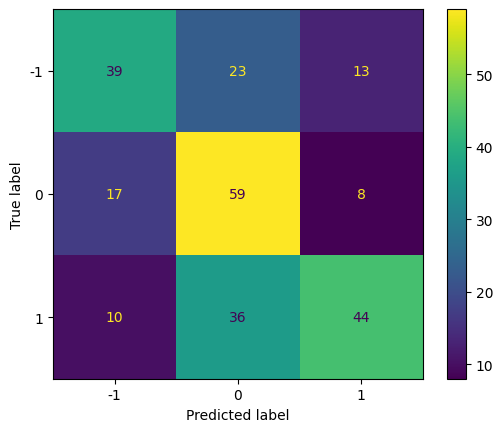

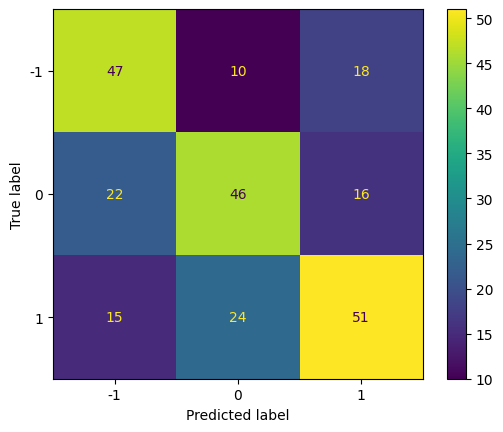

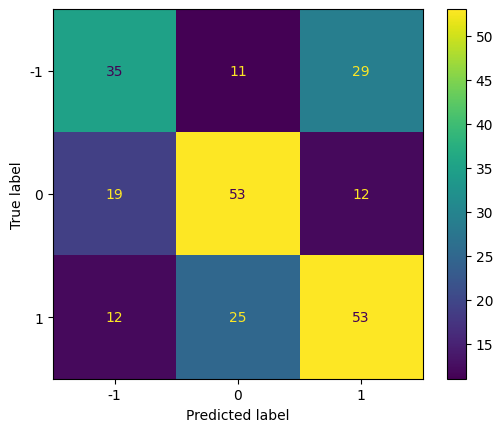

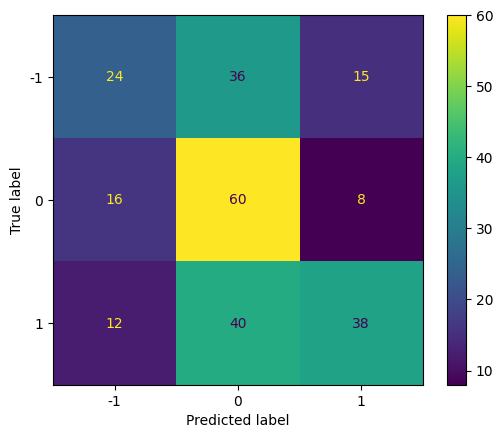

In [33]:
for i in lst_model:
  print(i)
  i.fit(x_train,y_train)
  y_predict = i.predict(x_test)
  print('*'*100)
  print(classification_report(y_test,y_predict))
  print('*'*100)
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_predict))
